In [1]:
# Usual
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import time
from tqdm import tqdm

# Autoreload
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

https://docs.google.com/document/d/10sXEhzFRSnvFcl3XxNGhnD4N2SedqwdAvK3dsihxVUA/edit#

In [2]:
import pybullet

In [3]:
import pybullet_envs.bullet.minitaur_gym_env as e
env = e.MinitaurBulletEnv(render=True)

current_dir=C:\Users\talvesdacosta\AppData\Local\Continuum\Anaconda3\lib\site-packages\pybullet_envs\bullet
current_dir=C:\Users\talvesdacosta\AppData\Local\Continuum\Anaconda3\lib\site-packages\pybullet_envs\bullet
urdf_root=C:\Users\talvesdacosta\AppData\Local\Continuum\Anaconda3\lib\site-packages\pybullet_data


# Understanding the environment

In [4]:
STATE_SIZE = env.observation_space.shape[0]
STATE_SIZE

28

In [5]:
print(env.action_space.low)
print(env.action_space.high)

[-1 -1 -1 -1 -1 -1 -1 -1]
[1 1 1 1 1 1 1 1]


In [9]:
ACTION_SIZE = env.action_space.shape[0]
ACTION_SIZE

8

# Random moves

## Try a random policy

In [7]:
np.random.random(8)*2 - 1

array([ 0.38536649,  0.56869759, -0.43308386,  0.9615505 , -0.83600312,
       -0.36766522, -0.43706896, -0.25853698])

In [8]:
def random_action():
    return np.random.random(ACTION_SIZE)*2 - 1

In [9]:
rewards = []
s_nexts = []
infos = []
s = env.reset()

for i in tqdm(range(100)):
    actions = random_action()
    env.render()
    s_next,r,done,info = env.step(actions)
    s_nexts.append(s_next)
    infos.append(info)
    rewards.append(r)

100%|████████████████████████████████████████| 100/100 [00:01<00:00, 51.89it/s]


## Explore the data returned by the environment

In [13]:
infos[0]

{}

In [14]:
rewards[:5]

[-0.00047881277044909521,
 -0.00024526470346701351,
 -0.0011944926061204396,
 -0.0011646968378199998,
 -0.0030942434154715166]

In [16]:
s_nexts[0]

array([  1.44067050e+00,   1.47115851e+00,   1.53102526e+00,
         1.52258336e+00,   1.53793137e+00,   1.54268266e+00,
         1.48200574e+00,   1.56954979e+00,  -9.38269728e+00,
        -2.77456238e+00,   2.89582127e+00,   2.37714265e+00,
         2.26310536e+00,   2.36976821e+00,  -4.29077102e+00,
         7.80139986e+00,  -1.59646062e+00,  -1.34636550e-01,
         8.59873974e-01,   2.23901040e+00,   2.74382541e+00,
         3.60712488e+00,  -8.72725117e-01,   1.96200634e+00,
        -2.23100006e-03,   1.87687846e-03,   5.42155351e-04,
         9.99995603e-01])

# First attempt with a DQN agent

In [6]:
import sys
sys.path.append("..")

In [7]:
from rl.agents.dqn_agent import DQNAgent

Using TensorFlow backend.


In [10]:
agent = DQNAgent(STATE_SIZE,ACTION_SIZE,low = -1,high = 1,action_type="continuous")

In [11]:
N_EPISODES = 1
MAX_STEPS = 2000

In [12]:
#---------------------------------------------
# ITERATION OVER EPISODES
for i_episode in range(N_EPISODES):

    # Reset the environment
    s = env.reset()
    reward = 0
    #-----------------------------------------
    # EPISODE RUN
    for i_step in range(MAX_STEPS):

        # Render the environement
        # env.render() #and (i_step % RENDER_EVERY == 0)

        # The agent chose the action considering the given current state
        a = agent.act(s)

        # Take the action, get the reward from environment and go to the next state
        s_next,r,done,info = env.step(a)
        reward += r

        # Remember the important variables
        agent.remember(s,a,r,s_next,done)

        # Go to the next state
        s = s_next

        # If the episode is terminated
        if done or i_step == MAX_STEPS - 1:
            print("Episode {}/{} finished after {} timesteps - epsilon : {:.2} - reward : {:.2}".format(i_episode+1,N_EPISODES,i_step,agent.epsilon,reward))
            break

Episode 1/1 finished after 256 timesteps - epsilon : 1.0 - reward : -0.19


In [14]:
import random

In [16]:
random.sample(agent.memory.cache,10)

[(array([  1.43191569,   1.82014992,   1.48289289,   2.04231692,
           1.42654218,   1.73445126,   1.52992927,   1.83697874,
          33.79970646,  -4.35366277, -14.92339901,  -4.83808762,
          13.61841987,   4.10288859,   1.73288879,  -5.04505522,
           5.7       ,  -0.79874492,   0.40535826,  -0.71684755,
           5.7       ,   3.18593194,   5.7       ,  -3.31216064,
           0.24061944,   0.04744645,   0.12110792,   0.96186485]),
  array([ 0.70911972,  0.41370538, -0.61102165, -0.91908158,  0.8837518 ,
          0.28344816,  0.89629353,  0.28595112]),
  0.00091001993369352677,
  array([  1.67570169,   1.56284253,   1.44013861,   1.921129  ,
           1.49058178,   1.69914002,   1.56512917,   1.74050997,
          18.69380798, -34.46744957,   2.54665391, -15.58817147,
           5.7983863 ,  -9.19209205,   6.54476268, -13.42215006,
          -2.01823071,  -2.21560997,   5.49085307,  -2.11867759,
           1.39155229,  -5.7       ,   5.7       ,  -4.45110801,
   

In [17]:
for s,a,r,s2,d in random.sample(agent.memory.cache,10):
    s = agent.expand_state_vector(s)
    s2 = agent.expand_state_vector(s2)
    
    print(agent.model.predict(s))

[[-6.27407074  2.36465549  1.7893852  -2.17177129 -1.71114409 -2.19664979
  -2.2330997  -3.76319456]]
[[-6.87748861 -0.74075544 -0.90776497 -2.85984898 -0.92940193  2.40037584
  -0.4016895  -0.97827351]]
[[-1.35147691  2.07544851  0.19006564 -0.70224947 -1.23897171  0.20759955
  -2.07310987 -2.25320101]]
[[-8.98901749 -1.13821292 -0.46107009  0.05533679  6.41993093 -2.01343751
  -2.62338924 -0.72103369]]
[[-3.24490952 -0.66888809  1.996346   -0.12613535 -0.43376571  0.86592627
  -1.52008319 -1.50002885]]
[[-5.23700857 -0.94768602 -0.89439744 -4.02588367  0.8717218   1.93433857
  -0.4948442   2.02600646]]
[[-4.69023657  0.99588394  1.06371164 -1.60207605 -0.62572771  1.84070849
  -1.50718725 -3.97688866]]
[[-11.24280453  -0.99452204  -4.41993952  -0.31197953   4.9947772
   -5.91279125  -0.39650393   0.6413511 ]]
[[-4.99332952 -0.46657062  2.18305159 -1.75606668 -1.46240413  0.51758784
  -2.03540564 -2.92698097]]
[[-6.55069065  2.05745554 -0.90178531 -7.84724236 -1.2399298   4.39114618
 

In [34]:
import sys
sys.path.append("C:/git/gdpr-scan/")

In [64]:
from gdpr_scanner import utils

In [65]:
fp = utils.FileParser()

In [67]:
%%time
data = fp.parse_folder("//EKIFILESERVER3/Sadri/1. Renault/")

hello
Wall time: 2.29 s


In [63]:
data.shape

(92892, 3)

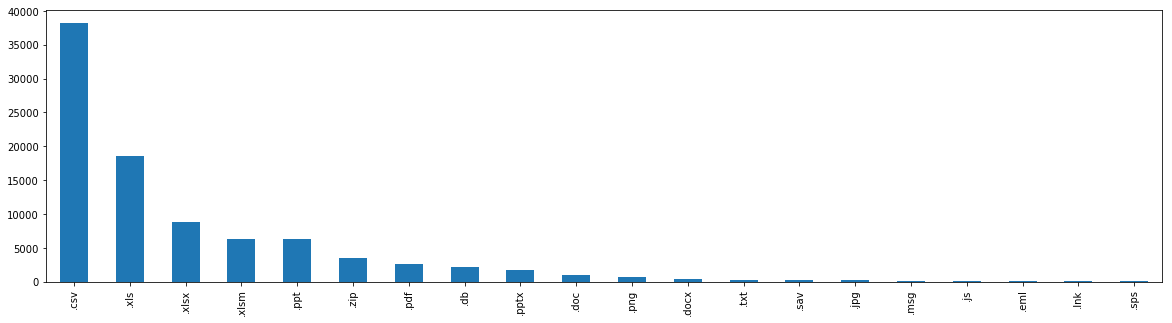

In [62]:
data["type"].value_counts().head(20).plot(kind = "bar",figsize = (20,5))
plt.show()

In [57]:
from ekimetrics.utils.time import play_alarm

In [58]:
play_alarm()